In [1]:

import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing excel data
df=pd.read_excel(('/Users/bunda/ersalina_github/coffee_shop/coffee_sales.xlsx'))

In [3]:
#data set info and number of coloumns adn rows
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


(149116, 11)

In [4]:
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [5]:
# checking null value
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
# checking duplicates value
df.duplicated().sum()

0

In [7]:
# formating date time transaction date
df['transaction_date'] = pd.to_datetime(df['transaction_date'], 
                                          format="mixed", 
                                          dayfirst=True)
df['day'] = pd.to_datetime(df['transaction_date']).dt.day


In [8]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1
...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,30
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,30
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,30
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,30


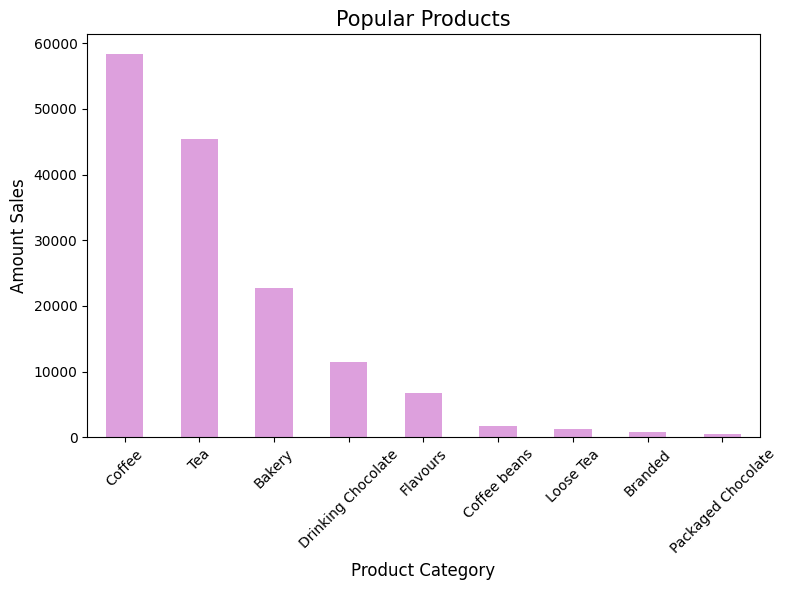

In [17]:
# most sales products
most_product=df['product_category'].value_counts()
plt.figure(figsize=(8,6))
most_product.plot(kind='bar', color='plum')
plt.title('Popular Products', fontsize=15)
plt.xlabel("Product Category",fontsize=12)
plt.ylabel("Amount Sales",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Calculate total amount per transaction
#df['total_amount'] = df['transaction_qty'] * df['unit_price']

# Set transaction_date as index
#df.set_index('transaction_date', inplace=True)

# Resample monthly and plot
#df.resample('M')['total_amount'].sum().plot(title="Monthly Sales Trend", figsize=(10,5))



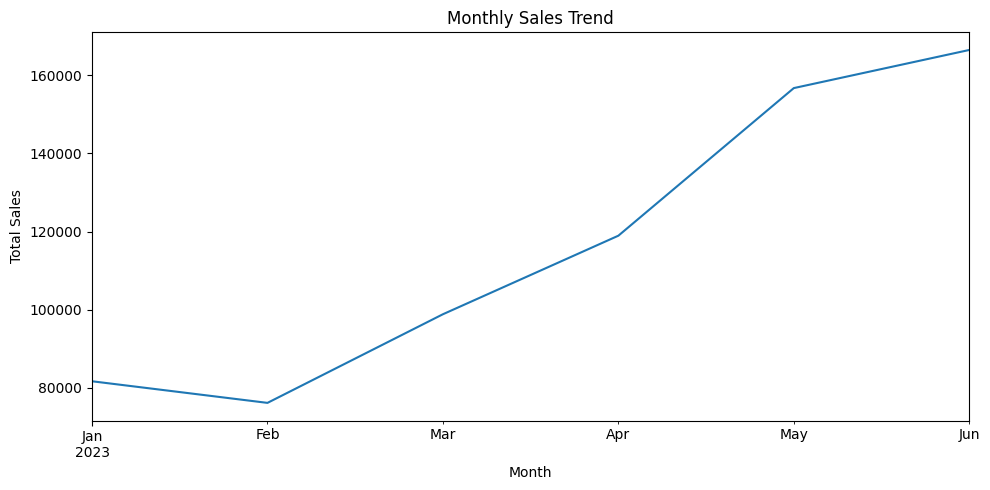

In [15]:
monthly_sales = df.resample('M')['total_amount'].sum()

fig, ax = plt.subplots(figsize=(10, 5))
monthly_sales.plot(ax=ax)

# Format x-axis to show month names
ax.set_xlabel("Month")
ax.set_ylabel("Total Sales")
ax.set_title("Monthly Sales Trend")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

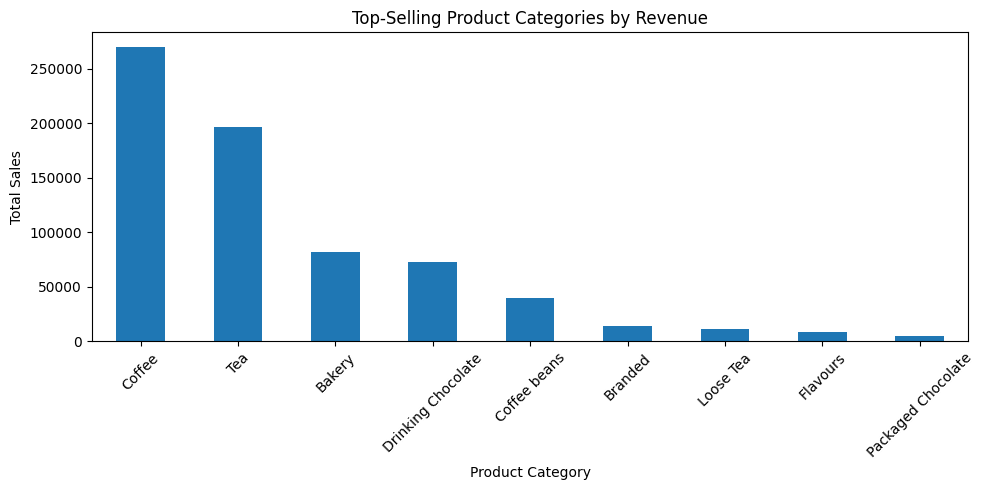

In [16]:


# Group by product_category
top_categories = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)

# Plot
top_categories.plot(kind='bar', figsize=(10,5), title="Top-Selling Product Categories by Revenue")
plt.ylabel("Total Sales")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



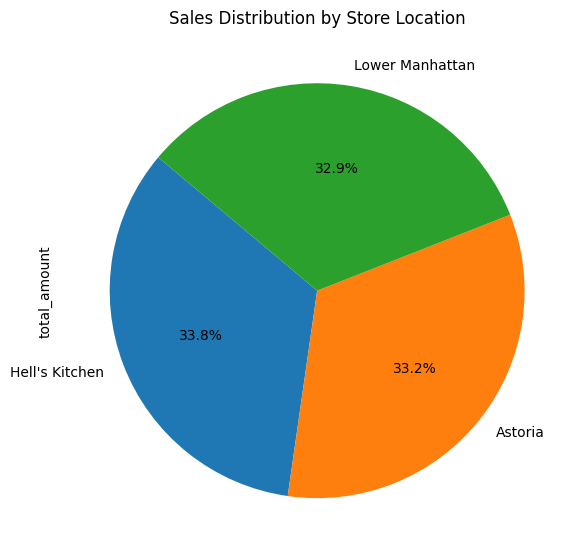

In [21]:
store_sales = df.groupby('store_location')['total_amount'].sum().sort_values(ascending=False)

# Plot as pie chart
plt.figure(figsize=(6, 6))
store_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    title='Sales Distribution by Store Location'
)
plt.tight_layout()
plt.show()


In [23]:
#customer behaviour
df['total_amount'] = df['transaction_qty'] * df['unit_price']

print("Average spend per transaction: ", df['total_amount'].mean())
print("Average quantity per transaction: ", df['transaction_qty'].mean())


Average spend per transaction:  4.686367190643527
Average quantity per transaction:  1.438276241315486


In [24]:
group_a = df[df['store_location'] == 'Lower Manhattan']['total_amount']
group_b = df[df['store_location'] == "Hell's Kitchen"]['total_amount']


In [28]:
!pip install scipy

In [ ]:
from scipy.stats import ttest_ind
